<a href="https://colab.research.google.com/github/merrymira/UPASS_ML_WEEK3/blob/main/UPASS_ML_WEEK8_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning Exercise
#PCA

Reference: https://archive.ics.uci.edu/dataset/174/parkinsons

##1. Loading the dataset

In [1]:
import pandas as pd

# Load the dataset
file_path = 'https://raw.githubusercontent.com/merrymira/UPASS_ML_WEEK3/refs/heads/main/data_practice_week8_parkinsons.data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [2]:
# Summary statistics of the dataset
summary = data.describe()

# Information about the dataset
info = data.info()

summary, info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

(       MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
 count   195.000000    195.000000    195.000000      195.000000   
 mean    154.228641    197.104918    116.324631        0.006220   
 std      41.390065     91.491548     43.521413        0.004848   
 min      88.333000    102.145000     65.476000        0.001680   
 25%     117.572000    134.862500     84.291000        0.003460   
 50%     148.790000    175.829000    104.315000        0.004940   
 75%     182.769000    224.205500    140.018500        0.007365   
 max     260.105000    592.030000    239.170000        0.033160   
 
        MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
 count        195.000000  195.000000  195.000000  195.000000    195.000000   
 mean           0.000044    0.003306    0.003446    0.009920      0.029709   
 std            0.000035    0.002968    0.002759    0.008903      0.018857   
 min            0.000007    0.000680    0.000920    0.002040      0.009540   
 25% 

##2. Check for imbalance classification problem

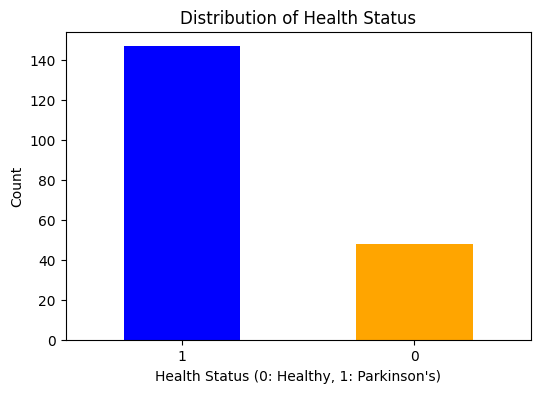

In [3]:
import matplotlib.pyplot as plt

# Plotting the distribution of the target variable (status)
plt.figure(figsize=(6, 4))
data['status'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Health Status')
plt.xlabel('Health Status (0: Healthy, 1: Parkinson\'s)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

##3. Perform PCA
Set the threshold to 90%

Explained Variance Ratio per Component:
 [5.89005041e-01 1.12994301e-01 7.00922613e-02 6.65902818e-02
 4.42689134e-02 3.31412915e-02 2.51020405e-02 1.64728788e-02
 1.31744611e-02 1.01875582e-02 6.38932478e-03 4.76551508e-03
 3.16986041e-03 1.73483094e-03 1.00053149e-03 8.08524478e-04
 5.66199903e-04 3.27915264e-04 1.58934882e-04 4.93161572e-05
 1.64470280e-08 1.50562914e-09]


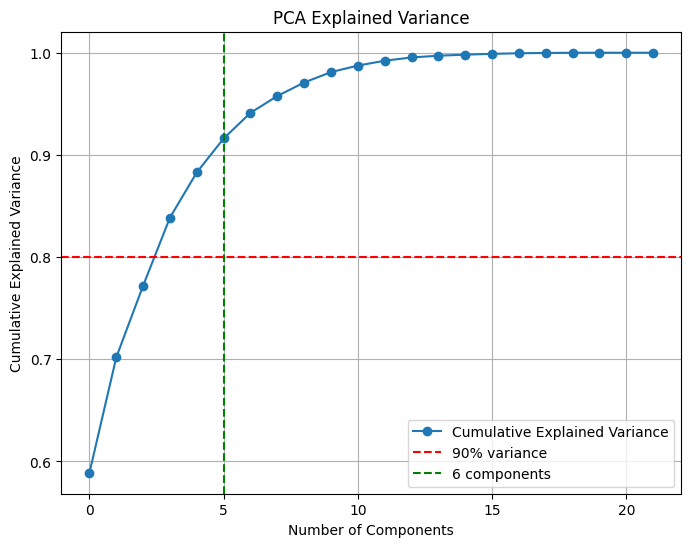

Cumulative Variance: [0.58900504 0.70199934 0.7720916  0.83868189 0.8829508  0.91609209
 0.94119413 0.95766701 0.97084147 0.98102903 0.98741835 0.99218387
 0.99535373 0.99708856 0.99808909 0.99889762 0.99946382 0.99979173
 0.99995067 0.99999998 1.         1.        ]
Number of Components (90% variance) =  6
Original Data Shape =  (195, 24)


In [4]:
# prompt: perform PCA on data and plot graph
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Split the data into features and target variable
X = data.drop(['status', 'name'], axis=1)
y = data['status']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Print the explained variance ratio
print("Explained Variance Ratio per Component:\n", pca.explained_variance_ratio_)

# Calculate the cumulative sum of the explained variance ratio
cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the number of principal components that explain at least 90% of the total variance
n_components = np.where(cumulative_var_ratio >= 0.90)[0][0] + 1

# Select the first n_components principal components from the transformed data
X_pca_selected = X_pca[:, :n_components]

# Plot the cumulative explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(cumulative_var_ratio, marker='o', label="Cumulative Explained Variance")
plt.axhline(y=0.80, color='r', linestyle='--', label='90% variance')  # Adjust this line to 90% if needed
plt.axvline(x=n_components-1, color='g', linestyle='--', label=f'{n_components} components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

# Cumulative variance
print("Cumulative Variance:", cumulative_var_ratio)
print('Number of Components (90% variance) = ', n_components)
print('Original Data Shape = ', data.shape)

In [5]:
# Split the data into features and target variable
X2 = data.drop(['status', 'name'], axis=1)

# Select only the numerical features for PCA
numerical_features = X2.select_dtypes(include=[np.number])

# Standardizing the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numerical_features)

# Fit PCA
# Use n_components derived from the previous analysis (explaining 90% variance)
# or a smaller number if desired for dimensionality reduction.
n_components = 6 # or 117 if you want to use all components that explain 90% of variance
pca = PCA(n_components=n_components)
pca.fit(data_scaled)

# Get the PCA components (loadings)
pca_components = pca.components_

# Create a DataFrame to hold the loadings for each component
loadings_df = pd.DataFrame(pca_components.T, index=numerical_features.columns, columns=[f'PC{i+1}' for i in range(n_components)])

# Find the top contributing features for each principal component
top_contributing_features = {}

# Iterate through the correct number of components
for i in range(n_components):
    component = f'PC{i+1}'
    top_features = loadings_df[component].abs().sort_values(ascending=False).head(6)  # Get top 10 features for each component
    top_contributing_features[component] = top_features.index.tolist()

# Display the top contributing features for each component
for pc, features in top_contributing_features.items():
    print(f"Top features contributing to {pc}-{len(features)}: {features}")

Top features contributing to PC1-6: ['MDVP:Shimmer(dB)', 'MDVP:Shimmer', 'MDVP:PPQ', 'MDVP:Jitter(%)', 'MDVP:APQ', 'Shimmer:DDA']
Top features contributing to PC2-6: ['MDVP:Fo(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Fhi(Hz)', 'DFA', 'RPDE', 'spread1']
Top features contributing to PC3-6: ['DFA', 'D2', 'RPDE', 'spread2', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)']
Top features contributing to PC4-6: ['MDVP:Jitter(Abs)', 'Shimmer:APQ5', 'DFA', 'NHR', 'Jitter:DDP', 'MDVP:RAP']
Top features contributing to PC5-6: ['spread2', 'DFA', 'RPDE', 'D2', 'MDVP:Flo(Hz)', 'PPE']
Top features contributing to PC6-6: ['MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'RPDE', 'DFA', 'MDVP:Fo(Hz)', 'D2']


In [6]:
# prompt: # Display the top contributing features for each component
# for pc, features in top_contributing_features.items():
#     print(f"Top features contributing to {pc}-{len(features)}: {features}")
# add print unique feature from across all component

# Display the top contributing features for each component
for pc, features in top_contributing_features.items():
    print(f"Top features contributing to {pc}-{len(features)}: {features}")

# Find unique features across all components
all_features = []
for features in top_contributing_features.values():
  all_features.extend(features)

unique_features = list(set(all_features))

print(f"\nUnique features across all components {len(unique_features)}:", unique_features)


Top features contributing to PC1-6: ['MDVP:Shimmer(dB)', 'MDVP:Shimmer', 'MDVP:PPQ', 'MDVP:Jitter(%)', 'MDVP:APQ', 'Shimmer:DDA']
Top features contributing to PC2-6: ['MDVP:Fo(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Fhi(Hz)', 'DFA', 'RPDE', 'spread1']
Top features contributing to PC3-6: ['DFA', 'D2', 'RPDE', 'spread2', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)']
Top features contributing to PC4-6: ['MDVP:Jitter(Abs)', 'Shimmer:APQ5', 'DFA', 'NHR', 'Jitter:DDP', 'MDVP:RAP']
Top features contributing to PC5-6: ['spread2', 'DFA', 'RPDE', 'D2', 'MDVP:Flo(Hz)', 'PPE']
Top features contributing to PC6-6: ['MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'RPDE', 'DFA', 'MDVP:Fo(Hz)', 'D2']

Unique features across all components 20: ['Shimmer:APQ5', 'RPDE', 'MDVP:Fo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Flo(Hz)', 'MDVP:Shimmer(dB)', 'Jitter:DDP', 'MDVP:APQ', 'NHR', 'DFA', 'MDVP:RAP', 'MDVP:Shimmer', 'spread2', 'MDVP:Jitter(Abs)', 'MDVP:Fhi(Hz)', 'PPE', 'D2', 'spread1', 'MDVP:PPQ', 'Shimmer:DDA']


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8974358974358975


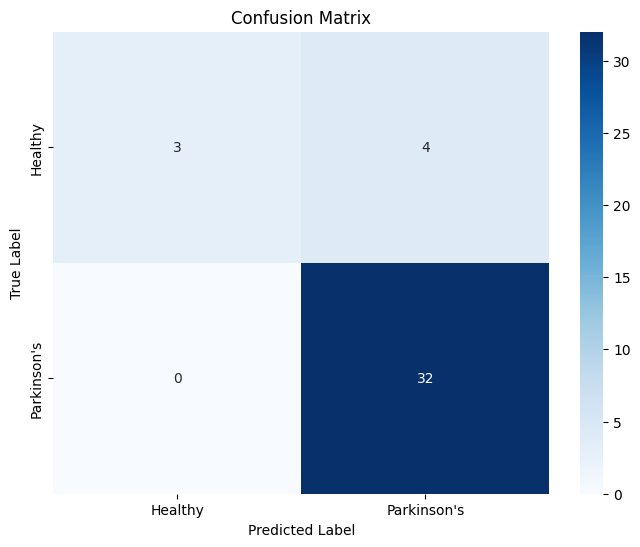

In [7]:
# prompt: train model on all features and print colorful confusion matrix

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix with color
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Healthy', 'Parkinson\'s'],
            yticklabels=['Healthy', 'Parkinson\'s'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy (Unique Features): 0.8974358974358975


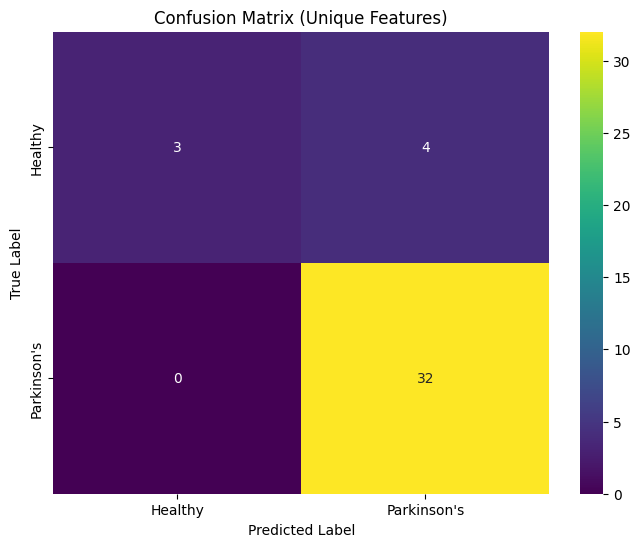

In [8]:
# prompt: train model on unique features from PCA and print colorful confusion matrix

# Select only the unique features identified by PCA
X_unique = data[unique_features]

# Split the data into training and testing sets
X_train_unique, X_test_unique, y_train, y_test = train_test_split(
    X_unique, y, test_size=0.2, random_state=42)

# Train a logistic regression model on the selected features
model_unique = LogisticRegression()
model_unique.fit(X_train_unique, y_train)

# Make predictions on the test set
y_pred_unique = model_unique.predict(X_test_unique)

# Evaluate the model
accuracy_unique = accuracy_score(y_test, y_pred_unique)
print("Accuracy (Unique Features):", accuracy_unique)

# Create a confusion matrix
cm_unique = confusion_matrix(y_test, y_pred_unique)

# Create a heatmap for the confusion matrix with color
plt.figure(figsize=(8, 6))
sns.heatmap(cm_unique, annot=True, fmt='d', cmap='viridis',  # Use 'viridis' for a colorful palette
            xticklabels=['Healthy', 'Parkinson\'s'],
            yticklabels=['Healthy', 'Parkinson\'s'])
plt.title('Confusion Matrix (Unique Features)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
